***BASIC STATISTICS FOR ANALYSIS***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import yfinance as yf


In [5]:
symbol = 'AAPL'
market = '^GSPC'
start = '2014-01-01'
end = '2024-01-01'

#Read Data
df = yf.download(symbol, start, end)
dfm = yf.download(market, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
df.columns = df.columns.get_level_values(0)
df.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,17.192825,17.314048,17.158324,17.272087,234684800
2014-01-03,16.815170,17.210543,16.798074,17.184434,392467600
2014-01-06,16.906862,16.996069,16.585777,16.705446,412610800
2014-01-07,16.785946,16.969955,16.720051,16.918980,317209200
2014-01-08,16.892250,16.957523,16.743986,16.747714,258529600


In [7]:
dfm.columns = dfm.columns.get_level_values(0)
dfm.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,1831.979980,1845.859985,1827.739990,1845.859985,3080600000
2014-01-03,1831.369995,1838.239990,1829.130005,1833.209961,2774270000
2014-01-06,1826.770020,1837.160034,1823.729980,1832.310059,3294850000
2014-01-07,1837.880005,1840.099976,1828.709961,1828.709961,3511750000
2014-01-08,1837.489990,1840.020020,1831.400024,1837.900024,3652140000


In [8]:
df.shape

(2516, 5)

In [9]:
new_df = pd.DataFrame({symbol : df['Close'], market : dfm['Close']}, index = df.index)

#compute returns
new_df[['stock_returns', 'market_returns']] = new_df[[symbol, market]] / new_df[[symbol, market]].shift(1) -1
new_df = new_df.dropna()
covmat = np.cov(new_df["stock_returns"], new_df["market_returns"])

#calculate measures
beta = covmat[0,1]/covmat[1,1]
alpha = np.mean(new_df['stock_returns']) - beta*np.mean(new_df['market_returns'])

print('Beta: ', beta)
print('Alpha: ', alpha)

Beta:  1.1899099939489355
Alpha:  0.0005905214127376028


In [10]:
close = df['Close']

***MEAN THE AVERAGE***

In [11]:
mean = np.mean(close)
print('Mean of Close: ', mean)

Mean of Close:  75.43264201411382


***MEDIAN IS THE MIDDLEMOST VALUE***

In [12]:
median = np.median(close)
median

np.float64(45.756683349609375)

***MODE: MOST FREQUENT VALUE VALUE IN THE SERIES***

In [13]:
mode = stats.mode(close, keepdims = True)   #keepdims ensures output is always array-like
print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 18.52147674560547 with a count of 2


***RANGE IS A MEASURE OF HOW SPREAD APART THE VALUES ARE***

In [14]:
range_of_stock = np.ptp(close)
range_of_stock

np.float64(181.13521480560303)

***VARIANCE IS A MEASURE OF HOW VARIABLE THE DATA IS***

In [15]:
variance = np.var(close)
variance

np.float64(3170.5339321713614)

***STANDARD DEVIATION IS THE SQ ROOT OF THE VARIANCE AND IS A MEASURE HOW THE DATA IS SPREAD OUT***

In [16]:
standard_deviation = np.std(close)
standard_deviation

np.float64(56.3074944582989)

***STANDARD ERROR is the mean estimates the variability between sample means that you would obtain if you took multiple samples from the same population***

In [17]:
standard_error = stats.sem(close)
standard_error

np.float64(1.1227865669038024)

***Z-score indicates how many standard deviations a data point is from the mean, and whether it lies above (positive Z) or below (negative Z) the mean***

In [18]:
z = np.abs(stats.zscore(close))
print(z)

[1.03431732 1.04102433 1.03939592 ... 2.06567844 2.07325966 2.0547475 ]


***CONTINGENCY TABLE SHOWS CORRELATIONS BETWEEN TWO VARIABLES***

In [19]:
data_crosstab = pd.crosstab(df['High'], df['Low'], margins = False)
print(data_crosstab)

Low         15.340909   15.438821   15.498502   15.519640   15.605738   \
High                                                                     
15.588950            1           0           0           0           0   
15.743432            0           1           0           0           0   
15.770476            0           0           1           0           0   
15.781667            0           0           0           1           0   
15.835442            0           0           0           0           0   
...                ...         ...         ...         ...         ...   
196.242892           0           0           0           0           0   
196.264932           0           0           0           0           0   
196.560561           0           0           0           0           0   
196.957666           0           0           0           0           0   
198.168786           0           0           0           0           0   

Low         15.627186   15.735662   1

***SCATTER PLOT shows 2 variables that are plotted along show correlation or not***

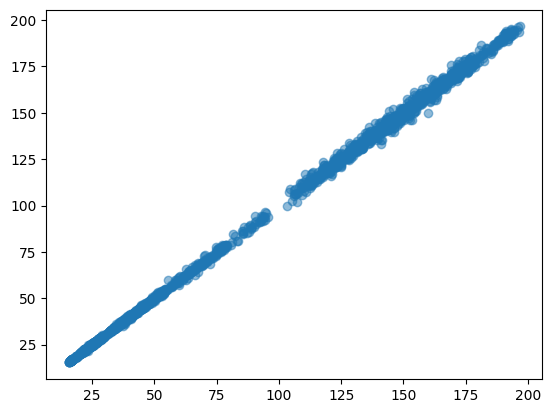

In [20]:
plt.scatter(df['Close'], df['Open'], alpha = 0.5)

***REGRESSION is a measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables***

In [24]:
df.shape


(2516, 5)

In [25]:
from sklearn.linear_model import LinearRegression

x = np.array(df['Open']).reshape(2516, -2)
y = np.array(df['Close'])

LR = LinearRegression().fit(x, y)
LR.score(x, y)

0.9993997391703943

In [26]:
LR.coef_

array([1.00067419])

In [27]:
LR.intercept_

np.float64(0.011873966293407534)

In [28]:
LR.predict(x)

array([ 17.29560566,  17.20789358,  16.72858276, ..., 191.23133419,
       192.87043521, 192.63200986], shape=(2516,))